In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("C:/Users/User/Documents/DATA ANALYST INTERNSHIP - Elevate Labs/Task 5/titanic/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# a.Use .describe(), .info(), .value_counts()

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.value_counts()

PassengerId  Survived  Pclass  Name                                                  Sex     Age   SibSp  Parch  Ticket    Fare      Cabin  Embarked
2            1         1       Cumings, Mrs. John Bradley (Florence Briggs Thayer)   female  38.0  1      0      PC 17599  71.2833   C85    C           1
572          1         1       Appleton, Mrs. Edward Dale (Charlotte Lamson)         female  53.0  2      0      11769     51.4792   C101   S           1
578          1         1       Silvey, Mrs. William Baird (Alice Munger)             female  39.0  1      0      13507     55.9000   E44    S           1
582          1         1       Thayer, Mrs. John Borland (Marian Longstreth Morris)  female  39.0  1      1      17421     110.8833  C68    C           1
584          0         1       Ross, Mr. John Hugo                                   male    36.0  0      0      13049     40.1250   A10    C           1
                                                                                 

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
#b.Use sns.pairplot(), sns.heatmap() for visualization

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
print(df["Sex"].value_counts)
print(df["Pclass"].value_counts)

<bound method IndexOpsMixin.value_counts of 0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object>
<bound method IndexOpsMixin.value_counts of 0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64>


In [11]:
#fill missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

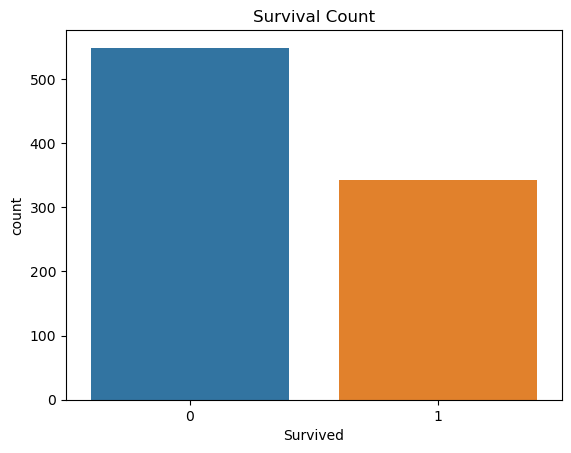

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


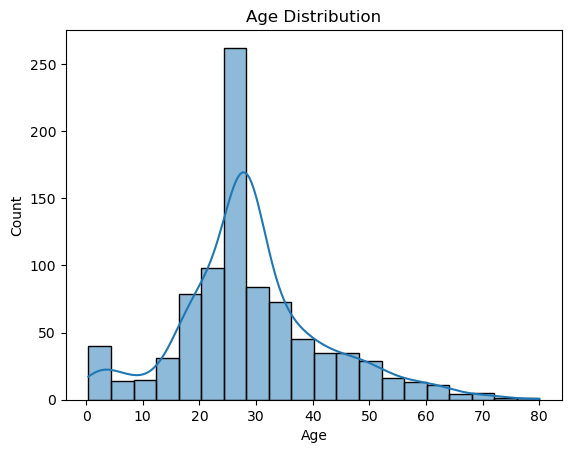

In [12]:
#univariate analysis
sns.countplot(x='Survived',data=df)
plt.title("Survival Count")
plt.show()

sns.histplot(df["Age"].dropna(), bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

1. Survival Count (Bar Plot):
The dataset contains more passengers who did not survive (Survived = 0) compared to those who survived (Survived = 1).
The difference is notable — the number of non-survivors is roughly twice the number of survivors.
This suggests that survival was less common, which aligns with the Titanic dataset’s historical context.

2. Age Distribution (Histogram with KDE):
The majority of passengers were between 20 and 40 years old, with a peak around 28–30 years.
There is a small group of very young passengers (infants and children under 10) and fewer elderly passengers (above 60).
The distribution is right-skewed, meaning there are fewer older passengers compared to younger ones.
The smooth KDE curve confirms the peak in the young adult range and gradual decline in counts as age increases.


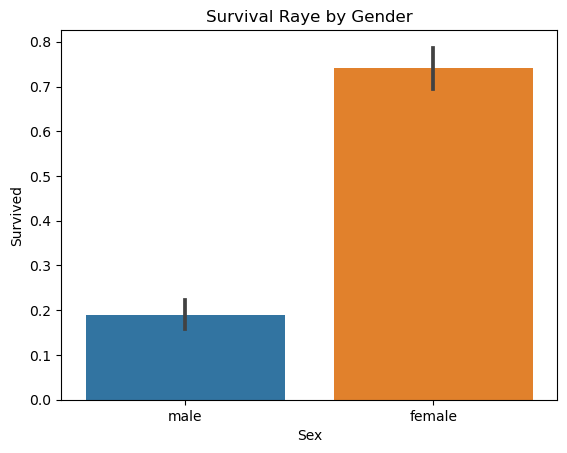

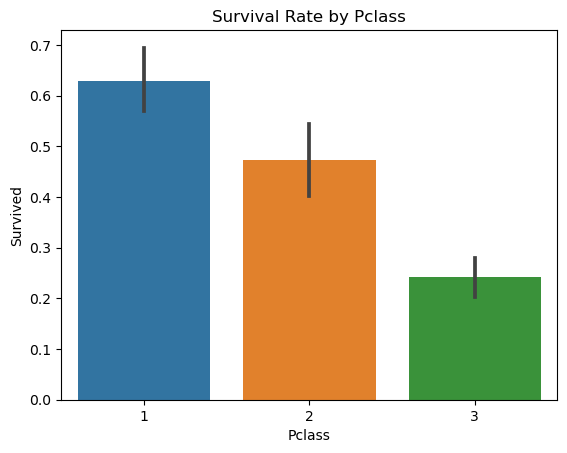

In [13]:
#bivariate analysis
sns.barplot(x="Sex",y="Survived", data=df)
plt.title("Survival Raye by Gender")
plt.show()

sns.barplot(x="Pclass",y="Survived", data=df)
plt.title("Survival Rate by Pclass")
plt.show()

1. Survival Rate by Gender:
Females had a much higher survival rate than males.
The female survival rate is above 70%, while the male survival rate is below 20%.
This strongly suggests that gender played a major role in survival, possibly due to the “women and children first” policy during evacuation.

2. Survival Rate by Passenger Class (Pclass):
Passengers in 1st class had the highest survival rate (around 65–70%).
2nd class passengers had a moderate survival rate (around 45–50%).
3rd class passengers had the lowest survival rate (around 25%).
This indicates that socioeconomic status, represented by ticket class, significantly influenced survival chances.

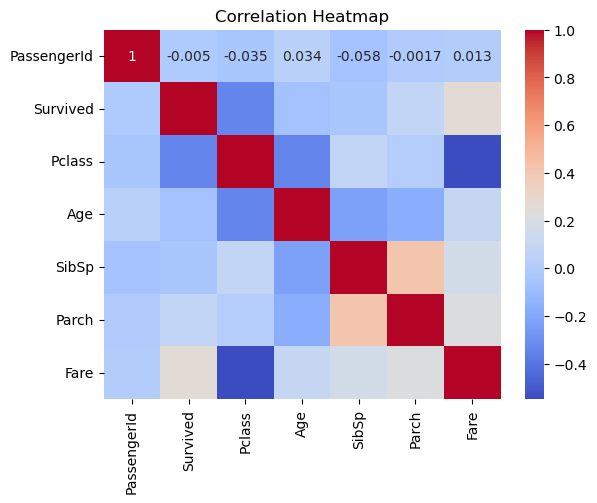

In [14]:
#c.Identify relationships and trends
numeric_df=df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Survival (Survived) shows:
Negative correlation with Pclas ~  (-0.338) - Higher classes had better survival chances.
Positive correlation with Far~ e (0.257) - Passengers who paid higher fares were more likely to survive.
Very weak correlation with Age, SibSp, and Parch - These factors individually had minimal influence on survival probability.
Pclass and Fare have a strong negative correla ion (-0.55) - Higher-class tickets cost more.
SibSp and Parch have a moderate positive correla~ tion (0.41) - Passengers with more siblings/spouses on board often also had more parents/children traveling with them.
Most other correlations are weak (<0.1), meaning the dataset variables are relatively independent except for the relationships noted above.above.

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

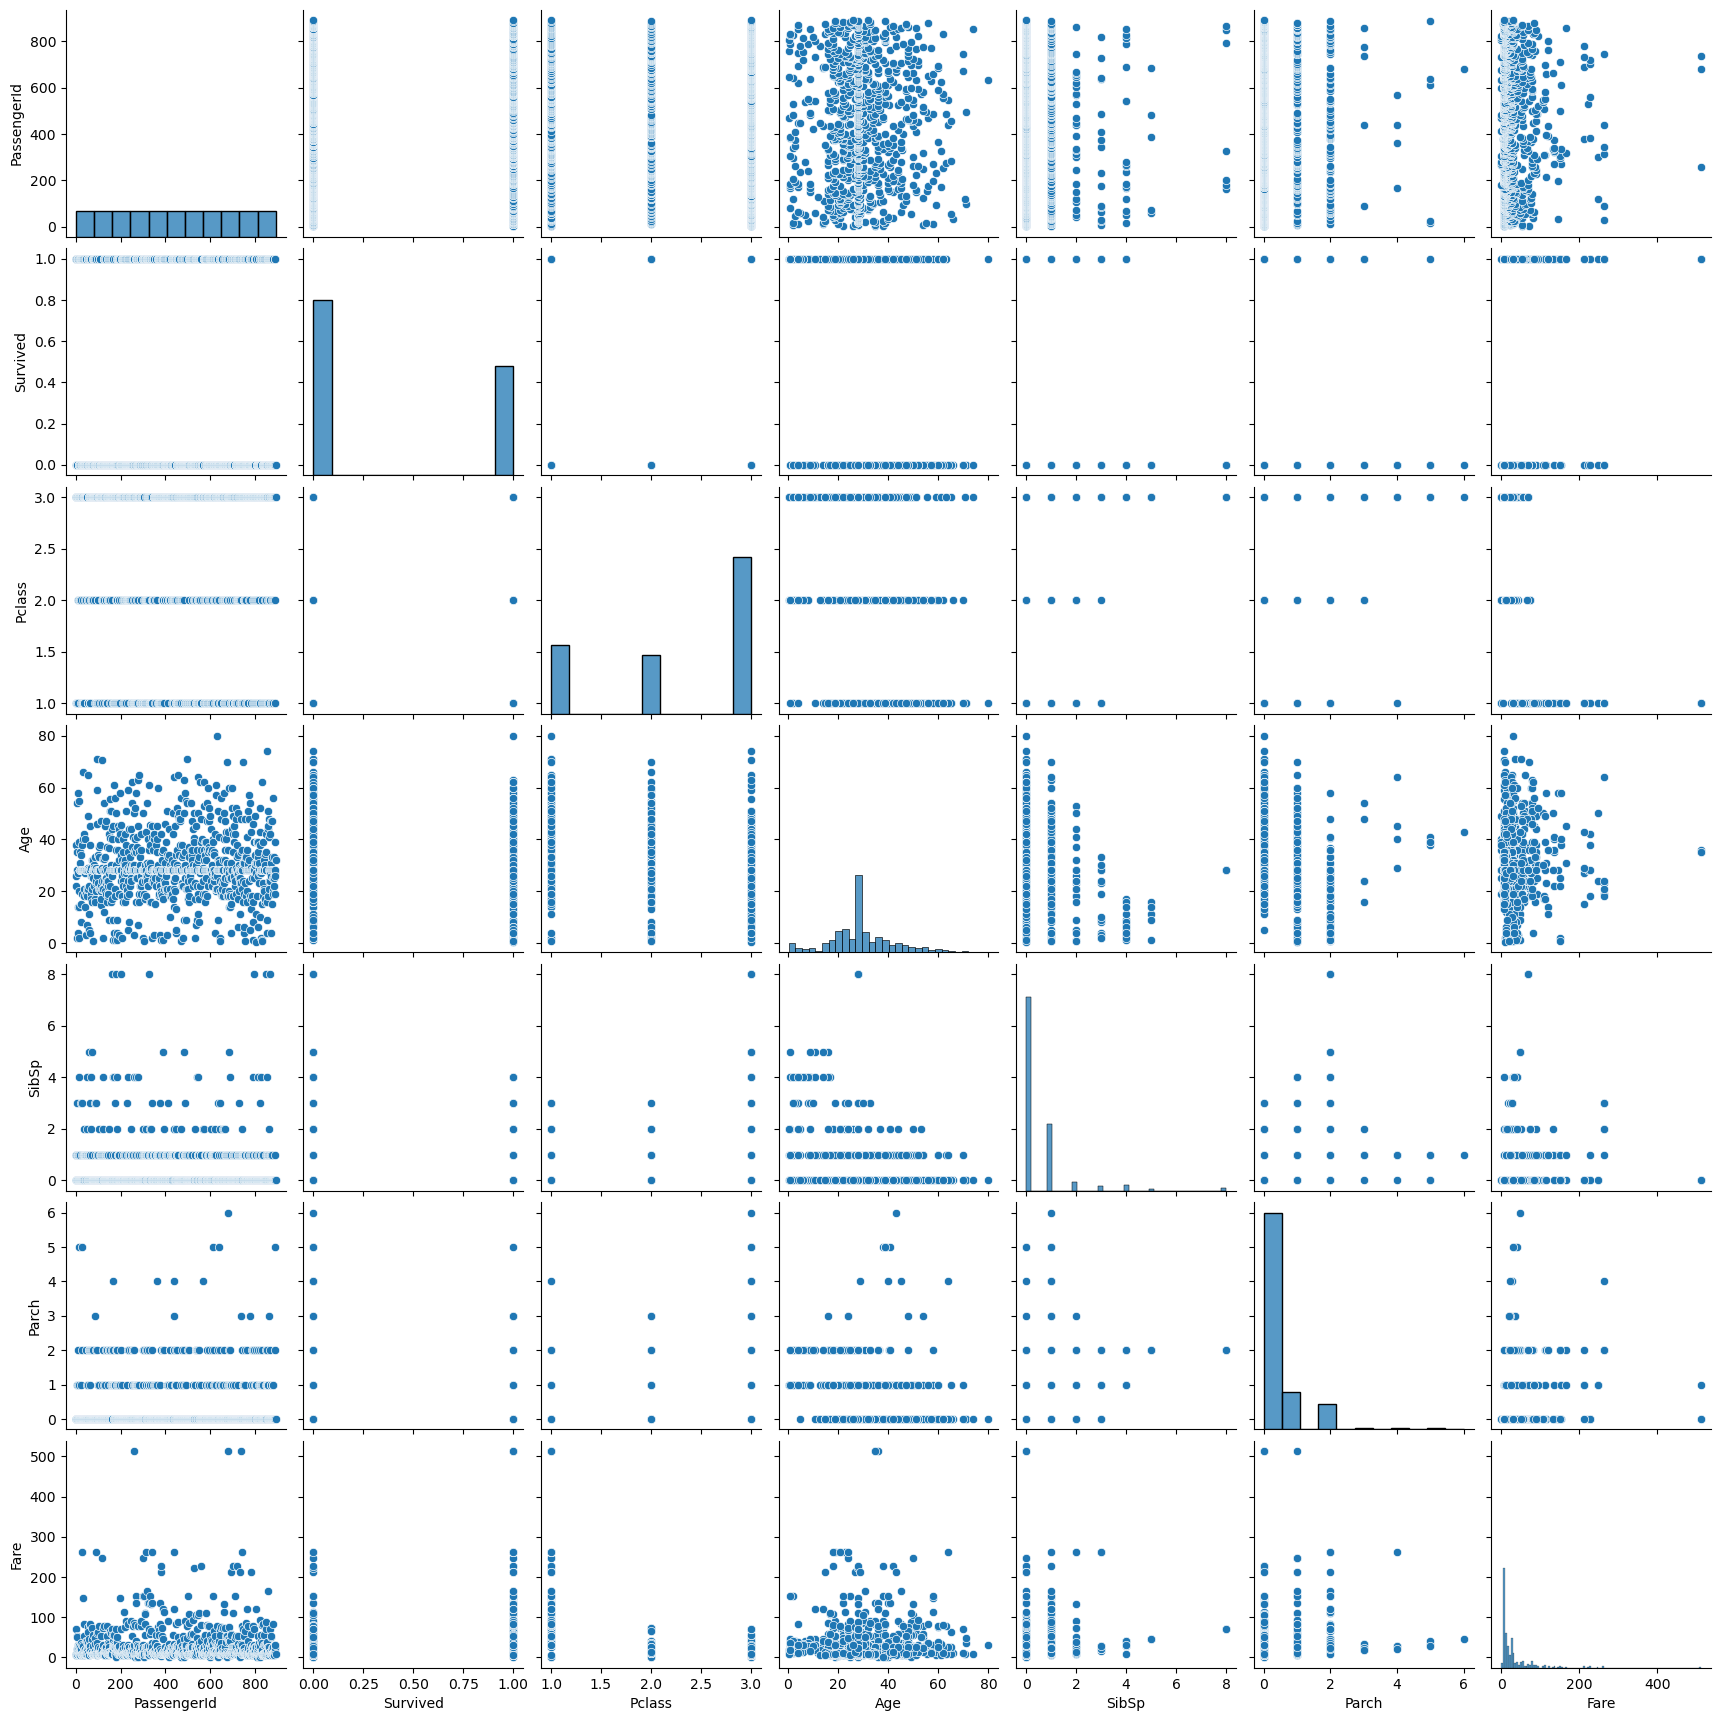

In [15]:
sns.pairplot(numeric_df)
plt.show()

Diagonal histograms show the distribution of each numeric variable:
Age is right-skewed, with most passengers between 20–40 years.
Fare is highly right-skewed, with a few passengers paying very high ticket prices.
SibSp and Parch have peaks at 0, meaning most passengers traveled alone without siblings/spouses or parents/children.


Scatter plots between variables:

Fare vs Pclass: Clear separation — higher fares are associated with lower Pclass values (1st class).

Fare vs Survived: Higher fares are generally linked to higher survival rates.

Age vs Survived: No strong linear relationship, but younger passengers seem to have slightly better survival chances.

SibSp & Parch: Positive relationship — passengers with more siblings/spouses tend to also have more parents/children.

No strong linear relationships among most variables, which supports earlier correlation heatmap findings.

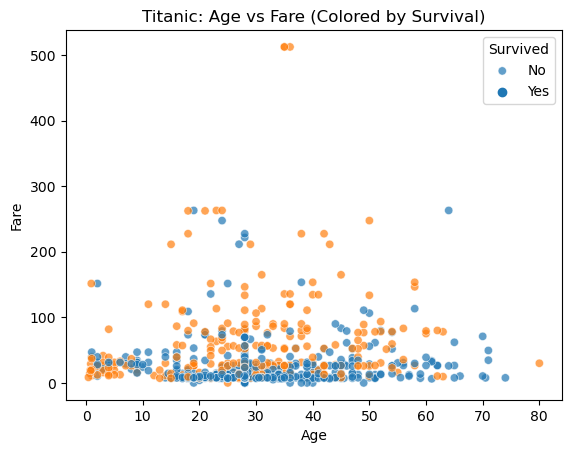

In [16]:
# catter plot: Age vs Fare, hue by Survived
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Titanic: Age vs Fare (Colored by Survival)')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

The observations for the Age vs Fare (Colored by Survival) scatter plot:

Most passengers paid fares below 100, regardless of age.

A few passengers paid extremely high fares (over 500), and these are mainly survivors — likely 1st-class passengers.

Survival (orange points) is more frequent among passengers with higher fares, indicating a link between wealth/class and survival chances.

Age does not show a strong trend with survival — survivors and non-survivors are spread across all age groups.

Younger passengers (children) and older passengers with higher fares seem to have had better chances of survival compared to low-fare passengers.